# **Project Business Statistics: E-news Express**


Description
Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?
 

Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Define Problem Statement and Objectives

To begin with, we have to start defining the hypotheses to be scrutinized. Considering that the company wants to know wether or not the new landpage is effective gathering more users than the previous one, a good way to frame the hypothesis would be the following:

***H0: NLP U - OLP U = OLP U***; The new landing page does not convert more users than the older one. 

***H1: NLP U - OLP U ≠ OLP U***: The new landing page does not convert more users than the older one. 

##**Import the necessary libraries**

In [1]:
##Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats



##**Read the data into a DataFrame**

In [2]:
#Import the database
df = pd.read_csv("abtest.csv")

In [3]:
#Checking the shape of the data.
df.shape

(100, 6)

###The data consists of 100 rows and 6 columns

In [4]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In the data we can see 4 categorical variables(all of them objects) and two numerical ones. Of the latter, the user_id is an integer variable and the time spent is a floating variable.

###Check for the missing values

In [5]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values within the data.

In [6]:
##Check for duplicated values
df.value_counts(df.duplicated())

False    100
dtype: int64

There are no duplicated values in the dataset, therefore we can make a statistical analysis to check for the hypothesis and correlation between the variables. 

###**Statistical summary**

In [7]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


###*Key Statistical insights*:




*   There are 100 elements to analyze, so we can infere the distribution tends to be normal. 
*   The mean time spent on the page is 5.3778 minutes. 
*   The standard deviation is of 2.378166 minutes. 
*   The minimum time spent is 0.19 minutes.
*   The maximum time spent is 10.71 minutes.

#**Univariate analysis**

####Let's check for the statistics of categorical variables

In [8]:
df["landing_page"].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

We have the exact same quantity of people in the samples. 

In [9]:
df["converted"].value_counts()

yes    54
no     46
Name: converted, dtype: int64

There are more people who converted than those who didn't.

In [10]:
df["language_preferred"].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

There are more people who speak French and Spanish than English speakers.

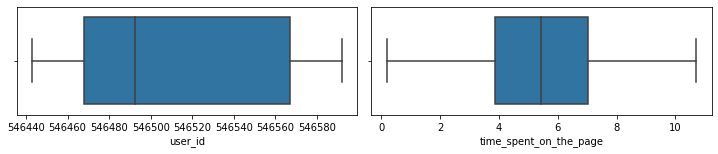

In [23]:

cols = 2
rows = 3
num_cols = df.select_dtypes(exclude="object").columns

fig = plt.figure( figsize=(cols*5, rows*2))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

The interquartile range from the time spent rounds from 4 to 7 minutes aproximately with a mean of 5.75 minutes moreless. There are no extreme values. 

#**Bivariate analysis**


In [24]:
df.groupby("language_preferred")["time_spent_on_the_page"].describe()

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,32.0,5.559063,2.621079,0.22,3.6175,5.755,7.1375,10.50
French,34.0,5.253235,2.675413,0.40,3.3950,5.315,7.3675,10.71
Spanish,34.0,5.331765,1.818095,0.19,4.4750,5.605,6.5150,8.72


The english language has the largest mean time spent of the three languages, although the maximum time spent was the one of a french user who spent 10.71 minutes. 

In [26]:
df.groupby("landing_page")["converted"].describe()

,count,unique,top,freq
landing_page,,,,
new,50,2,yes,33
old,50,2,no,29


In [27]:
df.groupby("language_preferred")["converted"].describe()

,count,unique,top,freq
language_preferred,,,,
English,32,2,yes,21
French,34,2,no,19
Spanish,34,2,yes,18


The English language presented the highest conversion rate among the three languages, while the spanish language had the lowest conversion rate.  

In [28]:
df.groupby("landing_page")["time_spent_on_the_page"].describe()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


The new page has the highest mean time spent on it, as well as the maximum time spent. 

###**Perform Visual Analysis**


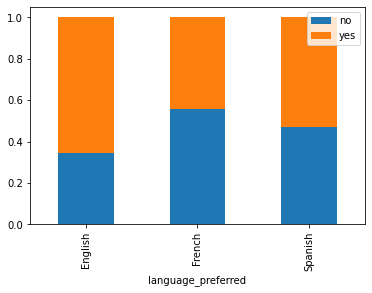

In [11]:
# create a stacked bar plot to compare the distributions of both the categorical features
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

Here we confirm the English language has the highest conversion rate, and proportionately, the French language has the lowest one. 

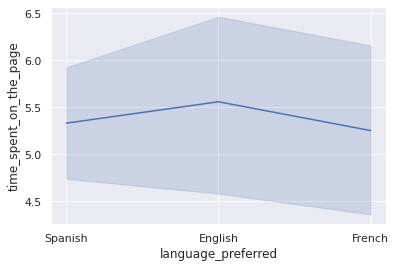

In [32]:
# create a stacked bar plot to compare the distributions of both the categorical features
sns.set_theme(style="darkgrid")


# Plot the responses for different languages and time spent
sns.lineplot(x="language_preferred", y="time_spent_on_the_page",
             data=df)

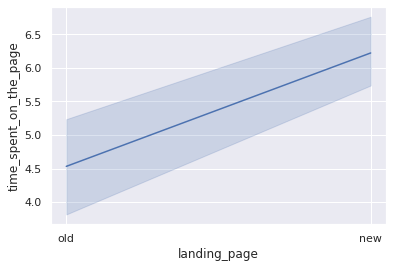

In [33]:
# create a stacked bar plot to compare the distributions of both the categorical features
sns.set_theme(style="darkgrid")


# Plot the responses for different languages and time spent
sns.lineplot(x="landing_page", y="time_spent_on_the_page",
             data=df)

Here there's a clear picture that the new page has a higher time spent by user. 

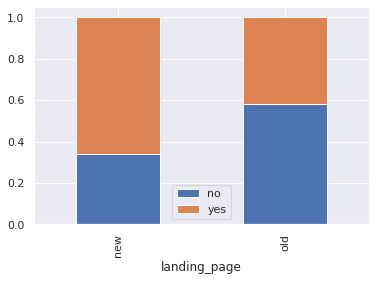

In [138]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

##**Analyze the numerical variables**

In [18]:
df.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


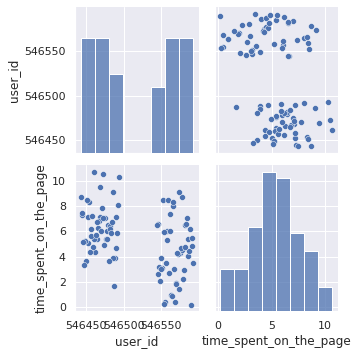

In [113]:
import seaborn as sns
sns.pairplot(df)

There is no presence of strong correlations between numerical variables. 



​
###**Step 1: Define the null and alternate hypotheses**

As we said before, considering that the company wants to know wether or not the new landpage is effective gathering more users than the previous one, a good way to frame the hypothesis would be the following:

**H0: New users gathered by NLP = 0 ; The new landing page does not convert new users.**


**H1: New users gathered by NLP ≠ 0 ; The new landing page converts new users.**



**Step 2: Select Appropriate test**

Since we are speaking about a problem where we are using two different samples of users and we want to check a relationship between two variables(Conversion and landing page), we would be using a Chi squared test of independence to determine wether or not there is a relationship between the landing page and the conversion.







**Step 3: Decide the significance level**

The significance level we are going to use is of 0.05, meaning that we are choosing a confidence interval of 95%.


**Step 4: Collect and prepare data**



In [139]:
## Define our variables
landing_page = df["landing_page"]
conversion = df["converted"]



In [143]:
contigency = pd.crosstab(df['landing_page'], df['converted'], normalize='index')
contigency


converted,no,yes
landing_page,,
new,0.34,0.66
old,0.58,0.42


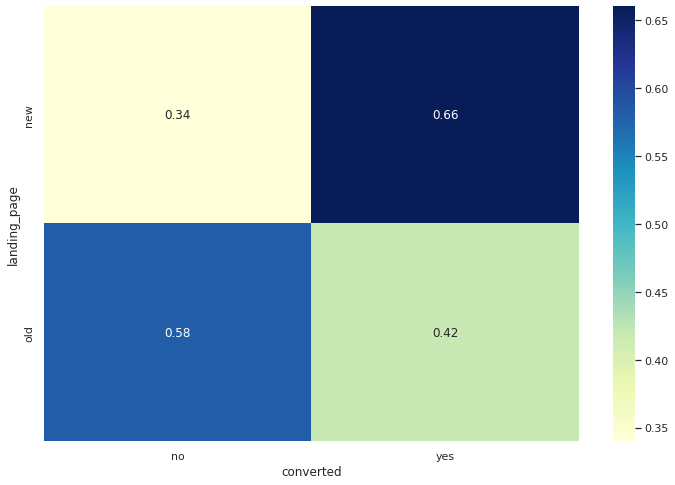

In [144]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

##**Step 5: Calculate the p-value**

​


In [147]:
from scipy.stats import chi2_contingency
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.2809185132581822


##**Step 6: Compare the p-value with 𝛼**

p = 0.2809185132581822;
𝛼 = 0.05

The p value is significantly higher than the alpha of 0.05. (0.2809 > 0.05)


##**Step 7: Draw inference**

Since the p value is greather than the alpha, we do not reject the null hypothesis. We can say that the variables of conversion and the landing page are independent. 

###2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

We can see that regardless of the statistical independence of the variables, there is a larger conversion rate in the new page than in the old page, with 66 % of the users in comparison to a rate of 44 % of the old page
​


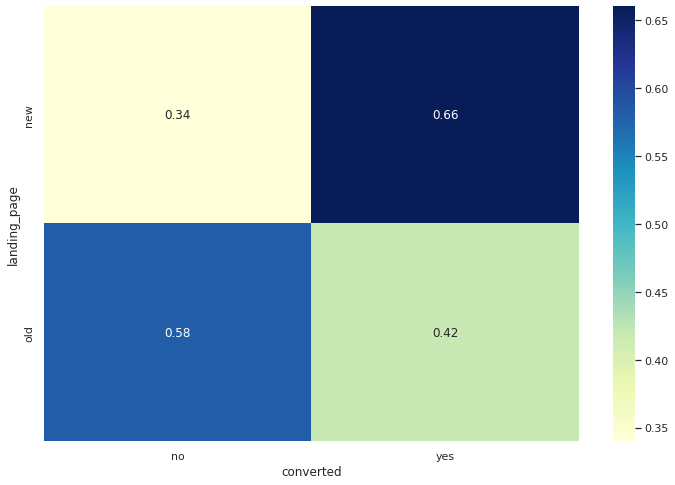

In [148]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

3. Is the conversion and preferred language are independent or related?


In [149]:
##H0: The language and the conversion are independent. 
##H1: The language and the conversion are not independent.
contigency2 = pd.crosstab(df['language_preferred'], df['converted'], normalize='index')
contigency2

converted,no,yes
language_preferred,,
English,0.343750,0.656250
French,0.558824,0.441176
Spanish,0.470588,0.529412


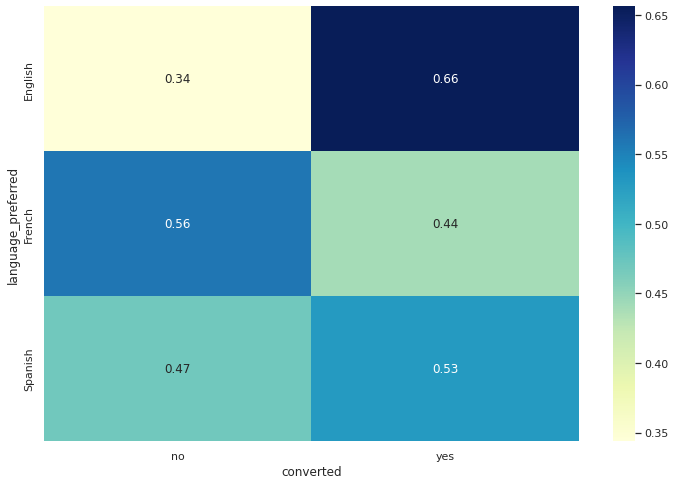

In [150]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency2, annot=True, cmap="YlGnBu")

In [151]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency2) 
# Print the p-value
print(p)

0.9540014809888923


p value = 0.95

The p value is higher than the alpha of 0.05. We do not reject the null hypothesis, and we can infere that the two variables are independent. 

4. Is the time spent on the new page same for the different language users?

​


In [187]:
relationship = df.groupby("landing_page")["time_spent_on_the_page","language_preferred"].describe()
relationship

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


time_spent_on_the_page                                        \
                              count    mean       std   min    25%    50%   
landing_page                                                                
new                            50.0  6.2232  1.817031  1.65  5.175  6.105   
old                            50.0  4.5324  2.581975  0.19  2.720  4.380   

                             
                 75%    max  
landing_page                 
new           7.1600  10.71  
old           6.4425  10.30

##**Conclusion and Business Recommendations**

Although we have seen statistical independence between the key variables, inferring that the conversion rate and the new page are independent variable, we can still see some key facts we should consider: 



1.   The language with the most spent time is English. 
2.   Spanish and French are the predominant languages.
3.   There is a higher conversion rate in the new land page. 
4.   The language with the highest conversion rate is English
5.   The mean time spent is higher in the new page than in the old one

Some recommendations we can give to the company with the data would be to keep innovating the landpage so they can get more leads, focus on the preferred languages that keep generating conversions which would be the three they have available now, and to search for new strategies that can generate leads since we hace seen that there is still no strong relationship between the tools they have made some far and the new conversion rates. 





